In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
taxi = pd.read_csv('green_tripdata_2018-06.csv')

In [3]:
taxi.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2018-06-01 00:33:55,2018-06-01 00:36:13,N,1,66,33,5,0.51,4.0,0.5,0.5,0.70,0.0,NaN,0.3,6.00,1,1
1,2,2018-06-01 00:40:36,2018-06-01 00:49:46,N,1,25,49,5,1.97,9.0,0.5,0.5,2.06,0.0,NaN,0.3,12.36,1,1
2,2,2018-06-01 00:57:12,2018-06-01 01:02:58,N,1,61,49,5,1.40,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2,1
3,2,2018-06-01 00:10:13,2018-06-01 00:16:27,N,1,49,97,1,1.36,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2,1
4,1,2018-06-01 00:32:08,2018-06-01 00:52:06,N,1,75,127,1,7.90,24.0,0.5,0.5,6.30,0.0,NaN,0.3,31.60,1,1


<h1> Task 1 - Data preprocessing

In [4]:
taxi.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
count,739373.000000,739373.000000,739373.000000,739373.000000,739373.000000,739373.000000,739373.000000,739373.000000,739373.000000,739373.000000,739373.000000,0.0,739373.000000,739373.000000,739373.000000,739373.000000
mean,1.838727,1.065254,111.230031,129.260628,1.357878,3.298843,13.906104,0.325185,0.489056,1.023625,0.186808,NaN,0.293675,16.252184,1.445667,1.015742
std,0.367783,0.496413,74.388120,76.823702,1.041089,3.738948,12.779641,0.396634,0.081254,2.040640,1.400115,NaN,0.048055,13.880869,0.521209,0.124475
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-80.000000,-4.500000,-0.500000,-2.000000,-6.000000,NaN,-0.300000,-80.000000,1.000000,1.000000
25%,2.000000,1.000000,51.000000,62.000000,1.000000,1.100000,6.500000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,8.300000,1.000000,1.000000
50%,2.000000,1.000000,82.000000,129.000000,1.000000,1.990000,10.000000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,12.000000,1.000000,1.000000
75%,2.000000,1.000000,166.000000,193.000000,1.000000,3.970000,17.000000,0.500000,0.500000,1.700000,0.000000,NaN,0.300000,19.300000,2.000000,1.000000
max,2.000000,6.000000,265.000000,265.000000,9.000000,143.100000,2113.000000,4.500000,0.500000,444.440000,765.060000,NaN,0.300000,2113.800000,5.000000,2.000000


In [5]:
# Checking for null values in the taxi dataframe
taxi.isnull().sum()

VendorID                      0
lpep_pickup_datetime          0
lpep_dropoff_datetime         0
store_and_fwd_flag            0
RatecodeID                    0
PULocationID                  0
DOLocationID                  0
passenger_count               0
trip_distance                 0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
ehail_fee                739373
improvement_surcharge         0
total_amount                  0
payment_type                  0
trip_type                     0
dtype: int64

In [6]:
# Number of records provided by each of the LPEP provider 1 = Creative Mobile Technologies, LLC; 2= VeriFone Inc.
taxi['VendorID'].value_counts()

2    620132
1    119241
Name: VendorID, dtype: int64

In [7]:
# Dropping the column ehail_fee as the whole column has nan values
taxi.drop(['ehail_fee'], axis=1,inplace = True)

In [8]:
taxi.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2018-06-01 00:33:55,2018-06-01 00:36:13,N,1,66,33,5,0.51,4.0,0.5,0.5,0.70,0.0,0.3,6.00,1,1
1,2,2018-06-01 00:40:36,2018-06-01 00:49:46,N,1,25,49,5,1.97,9.0,0.5,0.5,2.06,0.0,0.3,12.36,1,1
2,2,2018-06-01 00:57:12,2018-06-01 01:02:58,N,1,61,49,5,1.40,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2,1
3,2,2018-06-01 00:10:13,2018-06-01 00:16:27,N,1,49,97,1,1.36,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2,1
4,1,2018-06-01 00:32:08,2018-06-01 00:52:06,N,1,75,127,1,7.90,24.0,0.5,0.5,6.30,0.0,0.3,31.60,1,1


<h4>Dropping some columns which are not needed for analysis

In [9]:
taxi.drop(['store_and_fwd_flag','extra','mta_tax','tolls_amount','improvement_surcharge'], axis=1, inplace=True)
taxi.head(2)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type
0,2,2018-06-01 00:33:55,2018-06-01 00:36:13,1,66,33,5,0.51,4.0,0.70,6.00,1,1
1,2,2018-06-01 00:40:36,2018-06-01 00:49:46,1,25,49,5,1.97,9.0,2.06,12.36,1,1


<h4> Parsing the datatime column from object to datatime datatype

In [10]:
# The column with datetime is an object datatype which needs to be changed in datetime datatype
taxi['lpep_pickup_datetime'].dtype

dtype('O')

In [11]:
# changing to datatime datatype
taxi['lpep_pickup_datetime'] = pd.to_datetime(taxi['lpep_pickup_datetime'])
taxi['lpep_pickup_datetime'].dtype

dtype('<M8[ns]')

In [12]:
# Changing the datatype from object to datatime for the column lpep_dropoff_datetime
taxi['lpep_dropoff_datetime'] = pd.to_datetime(taxi['lpep_dropoff_datetime'])
taxi['lpep_dropoff_datetime'].dtype

dtype('<M8[ns]')

<h4> Splitting the parsed datetime column into hours, months and day of week

In [13]:
# splitting the lpep_pickup_datetime to a seperate column inti hours, month aand day of the week.

taxi['Hour_pickup'] = taxi['lpep_pickup_datetime'].apply(lambda time: time.hour)
taxi['Month_pickup'] = taxi['lpep_pickup_datetime'].apply(lambda time: time.month)
taxi['Day of Week_pickup'] = taxi['lpep_pickup_datetime'].apply(lambda time: time.dayofweek)

<h4> Using map() mapping the actual categorical name for day of week

In [14]:
# Use the .map() with this dictionary to map the actual string names to the day of the week:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
taxi['Day of Week_pickup'] = taxi['Day of Week_pickup'].map(dmap)
taxi.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type,Hour_pickup,Month_pickup,Day of Week_pickup
0,2,2018-06-01 00:33:55,2018-06-01 00:36:13,1,66,33,5,0.51,4.0,0.70,6.00,1,1,0,6,Fri
1,2,2018-06-01 00:40:36,2018-06-01 00:49:46,1,25,49,5,1.97,9.0,2.06,12.36,1,1,0,6,Fri
2,2,2018-06-01 00:57:12,2018-06-01 01:02:58,1,61,49,5,1.40,6.5,0.00,7.80,2,1,0,6,Fri
3,2,2018-06-01 00:10:13,2018-06-01 00:16:27,1,49,97,1,1.36,7.0,0.00,8.30,2,1,0,6,Fri
4,1,2018-06-01 00:32:08,2018-06-01 00:52:06,1,75,127,1,7.90,24.0,6.30,31.60,1,1,0,6,Fri


In [15]:
# splitting the lpep_dropoff_datetime to a seperate column inti hours, month aand day of the week.
taxi['Hour_drop'] = taxi['lpep_dropoff_datetime'].apply(lambda time: time.hour)
taxi['Month_drop'] = taxi['lpep_dropoff_datetime'].apply(lambda time: time.month)
taxi['Day of Week_drop'] = taxi['lpep_dropoff_datetime'].apply(lambda time: time.dayofweek)

In [16]:
# Use the .map() with this dictionary to map the actual string names to the day of the week:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
taxi['Day of Week_drop'] = taxi['Day of Week_drop'].map(dmap)
taxi.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type,Hour_pickup,Month_pickup,Day of Week_pickup,Hour_drop,Month_drop,Day of Week_drop
0,2,2018-06-01 00:33:55,2018-06-01 00:36:13,1,66,33,5,0.51,4.0,0.70,6.00,1,1,0,6,Fri,0,6,Fri
1,2,2018-06-01 00:40:36,2018-06-01 00:49:46,1,25,49,5,1.97,9.0,2.06,12.36,1,1,0,6,Fri,0,6,Fri
2,2,2018-06-01 00:57:12,2018-06-01 01:02:58,1,61,49,5,1.40,6.5,0.00,7.80,2,1,0,6,Fri,1,6,Fri
3,2,2018-06-01 00:10:13,2018-06-01 00:16:27,1,49,97,1,1.36,7.0,0.00,8.30,2,1,0,6,Fri,0,6,Fri
4,1,2018-06-01 00:32:08,2018-06-01 00:52:06,1,75,127,1,7.90,24.0,6.30,31.60,1,1,0,6,Fri,0,6,Fri


<h1> Task 2 - Analyzing trends
<h4> For the analysis, trying to find some similarities, trends among the two type of trips
<h4> For the trip_type column 1 -> Street-hail type of trip, 2 -> Dispatch type of trip

In [17]:
# 1 = street hail, 2 = dispatch, counting trips by each of the type
taxi['trip_type'].value_counts()

1    727734
2     11639
Name: trip_type, dtype: int64

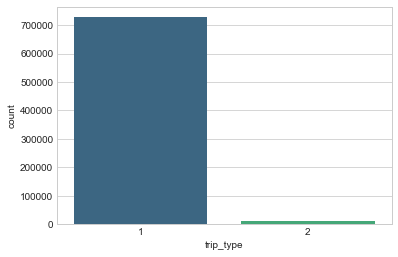

In [18]:
# Visuaaly showing the distribution of both the type of trips
sns.countplot(x='trip_type',data=taxi,palette='viridis')

<h4> One of the research question is at what time the most number of taxis are requested for ride

In [19]:
# At what hour is the most taxi rides are taken
h1 = taxi['Hour_pickup'].value_counts().head(1)
print('Most taxi rides requested at hour : ', h1)

Most taxi rides requested at hour :  18    51162
Name: Hour_pickup, dtype: int64


In [20]:
# At what hour Street hail type of trip are requested for rides
h2 = taxi[taxi['trip_type'] == 1]['Hour_pickup'].value_counts().head(1)
print('At what hour Street hail type of trip are requested for rides : ', h2)

At what hour Street hail type of trip are requested for rides :  18    50575
Name: Hour_pickup, dtype: int64


In [21]:
# At what hour dispatch type of trip are requested for rides
h3 = taxi[taxi['trip_type'] == 2]['Hour_pickup'].value_counts().head(1)
print('At what hour dispatch type of trip are requested for rides:', h3)

At what hour dispatch type of trip are requested for rides: 8    642
Name: Hour_pickup, dtype: int64


<h4> Which is the most busiest day for taxi rides

In [22]:
d1= taxi[taxi['trip_type'] == 2]['Day of Week_drop'].value_counts()
print('The most dispatch type ride is on :',d1)

The most dispatch type ride is on : Sat    2311
Fri    2037
Sun    1623
Mon    1491
Thu    1445
Wed    1426
Tue    1306
Name: Day of Week_drop, dtype: int64


In [23]:
d2= taxi[taxi['trip_type'] == 1]['Day of Week_drop'].value_counts()
print('The most dispatch type ride is on :',d2)

The most dispatch type ride is on : Sat    131738
Fri    127527
Thu     98399
Wed     95876
Sun     93109
Tue     91600
Mon     89485
Name: Day of Week_drop, dtype: int64


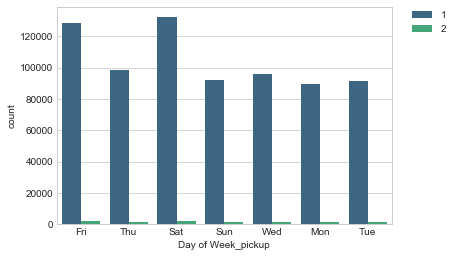

In [24]:
#  countplot of the Day of Week column with the hue based off of the trip_type column.
sns.countplot(x='Day of Week_pickup',data=taxi,hue='trip_type',palette='viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<h4> Which pick up location is mostly influenced for requesting a taxi ride

In [25]:
d3= taxi[taxi['trip_type'] == 1]['PULocationID'].value_counts().head(1)
print('The most Street-hail type ride is on :',d3)

The most Street-hail type ride is on : 74    47137
Name: PULocationID, dtype: int64


In [26]:
d4= taxi[taxi['trip_type'] == 2]['PULocationID'].value_counts().head(1)
print('The most dispatch type ride is on :',d4)

The most dispatch type ride is on : 244    554
Name: PULocationID, dtype: int64


<h4> Finding the trends between tip_amount and total_amount

Text(0.5,1,'Trend of tip with total_amount')

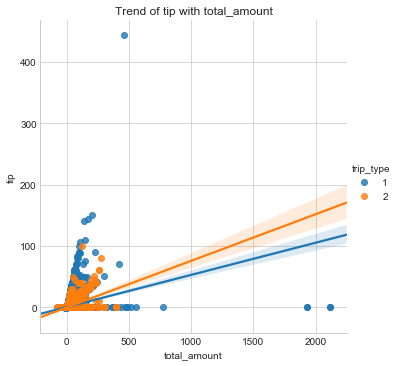

In [34]:
sns.lmplot(x='total_amount', y='tip_amount',hue='trip_type', data=taxi)
plt.xlabel('total_amount')
plt.ylabel('tip')
plt.title('Trend of tip with total_amount')

In [35]:
taxi.loc[taxi['tip_amount'].idxmax()]

VendorID                                   2
lpep_pickup_datetime     2018-06-30 16:54:07
lpep_dropoff_datetime    2018-06-30 17:08:24
RatecodeID                                 1
PULocationID                             166
DOLocationID                             246
passenger_count                            1
trip_distance                           4.48
fare_amount                               16
tip_amount                            444.44
total_amount                          461.24
payment_type                               1
trip_type                                  1
Hour_pickup                               16
Month_pickup                               6
Day of Week_pickup                       Sat
Hour_drop                                 17
Month_drop                                 6
Day of Week_drop                         Sat
Name: 727733, dtype: object

<h4> The rides requested are often for how many peoples and is there any different between number of people can take ride from both the trip_type

In [27]:
d5 = taxi[taxi['trip_type'] == 2]['passenger_count'].value_counts()
d5

1    9238
2    1462
3     454
4     185
5     184
0      85
8      12
7      10
6       7
9       2
Name: passenger_count, dtype: int64

In [28]:
d6 = taxi[taxi['trip_type'] == 1]['passenger_count'].value_counts()
d6

1    614765
2     55770
5     24801
6     13580
3     12553
4      4776
0      1487
8         1
7         1
Name: passenger_count, dtype: int64

<h4> Total revenue generated from each of the two type of trip

In [29]:
# Total revenue generated by total fare by dispatch type of ride
d6 = sum(taxi[taxi['trip_type'] == 2]['total_amount'])
print('Total fare collected from dispatch type of ride : $',round(d6,2))

Total fare collected from dispatch type of ride : $ 236119.6


In [30]:
# # Total revenue generated by total fare by Hail-Street type of ride
d7 = sum(taxi[taxi['trip_type'] == 1]['total_amount'])
print('Total fare collected from Hail-Street type of ride : $',round(d7,2))

Total fare collected from Hail-Street type of ride : $ 11780306.56


<h4> Distribution of payment type by customer 
1= Credit card
2= Cash
3= No charge
4= Dispute
5= Unknown

In [31]:
# Distribution of payment type by hail-street type of ride
d8 = taxi[taxi['trip_type'] == 1]['payment_type'].value_counts()
d8

1    412479
2    310159
3      3384
4      1687
5        25
Name: payment_type, dtype: int64

In [32]:
d9 = taxi[taxi['trip_type'] == 2]['payment_type'].value_counts()
d9

2    6773
1    4597
3     158
4     107
5       4
Name: payment_type, dtype: int64

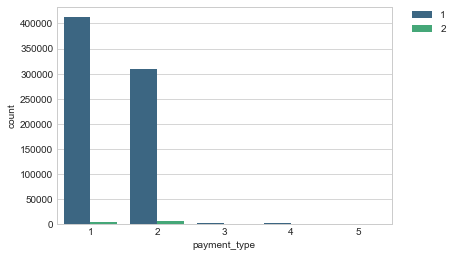

In [33]:
#  countplot of the Day of Week column with the hue based off of the trip_type column.
sns.countplot(x='payment_type',data=taxi,hue='trip_type',palette='viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<h1> Task - 3 Creating predictive model

In [88]:
taxi.head(3)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type,Hour_pickup,Month_pickup,Day of Week_pickup,Hour_drop,Month_drop,Day of Week_drop
0,2,2018-06-01 00:33:55,2018-06-01 00:36:13,1,66,33,5,0.51,4.0,0.70,6.00,1,1,0,6,Fri,0,6,Fri
1,2,2018-06-01 00:40:36,2018-06-01 00:49:46,1,25,49,5,1.97,9.0,2.06,12.36,1,1,0,6,Fri,0,6,Fri
2,2,2018-06-01 00:57:12,2018-06-01 01:02:58,1,61,49,5,1.40,6.5,0.00,7.80,2,1,0,6,Fri,1,6,Fri


<h4> Heat map to find the correlation between the variables

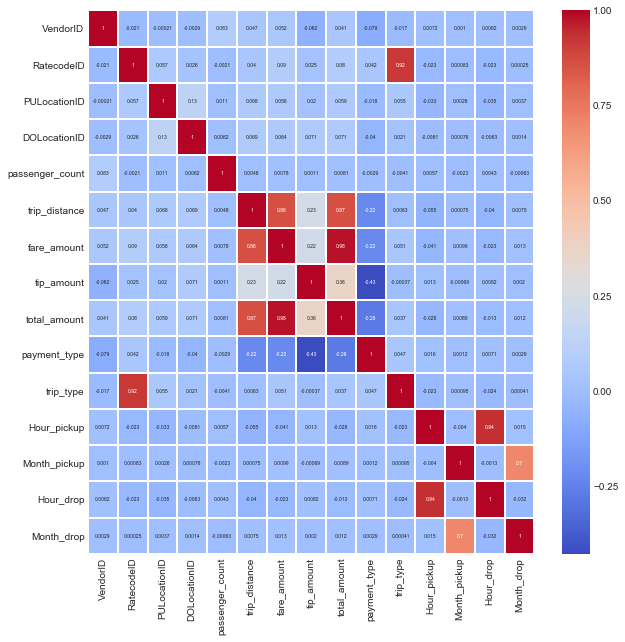

In [210]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(taxi.corr(),cmap='coolwarm',annot=True, linewidths=1, annot_kws={"size":5})

<h4> Splitting the dataset into X and y, where y has the dependent variable whihc is trip_type. So we are trying to predict the trip type for the test set of June 2018

In [149]:
X = taxi.iloc[:,[0,3,4,5,6,7,8,9,10,11,13,14,16,17]].values
y = taxi.iloc[:,12].values

<h4> Splitting into X_train, X_test, y_train, y_test

In [150]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

<h4> Creating a classification algorithm - Logistic Regression model, to predict the trip type

In [154]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<h4> Fitting the model to predict the X_test set

In [155]:
y_pred = classifier.predict(X_test)

In [156]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

<h4> Confusion Matrix for checking the accuracy

In [157]:
# Creating confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [220]:
cm

array([[181806,    129],
       [   256,   2653]])

 <h4> From the confusion matrix is evident that the model performance is great with just 385 wrong prediction.

<h4> Creating a csv file of all the y_pred observation for the X_test observation

In [203]:
Y_predicted_trip_type = pd.DataFrame(y_pred, columns=['predictions_Trip_Type']).to_csv('Y_predicted_trip_type.csv')


<h4> Creating a csv file for all the X_test observation

In [204]:
X_test_Data = pd.DataFrame(X_test, columns=['VendorID','RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count','trip_distance','fare_amount','tip_amount','total_amount','payment_type', 'Hour_pickup', 'Month_pickup','Hour_drop', 'Month_drop']).to_csv('X_test_Data.csv')

<h4> Merging both the csv file and generating an output with the observation and predicted column

In [205]:
a = pd.read_csv('X_test_Data.csv')

In [206]:
b = pd.read_csv('Y_predicted_trip_type.csv')

In [207]:
merged = a.merge(b)


In [208]:
merged.to_csv("Predcition_output_June_2016.csv", index=False)